# Projet IA - MGL869
## Import du jeu de données

In [2]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})
df

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Supprimer valeurs manquantess

In [3]:
df.dropna(inplace=True)

## Préparation du jeu de données
### Création d'un nouveau df

In [4]:
df2 = df.copy()

### Transformation colonne numerique en colonne categorielle

In [5]:
df2["family_history_with_overweight"] = df["family_history_with_overweight"].map({"yes": True, "no": False})
df2["FAVC"] = df["FAVC"].map({"yes": True, "no": False})
df2["SMOKE"] = df["SMOKE"].map({"yes": True, "no": False})
df2["SCC"] = df["SCC"].map({"yes": True, "no": False})

### Rapport sur les données numériques

In [6]:
df2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df2["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

### Age

/tmp/ipykernel_6165/1978995442.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdf.replace({False: -1, True: 1}, inplace=True)


<AxesSubplot:>

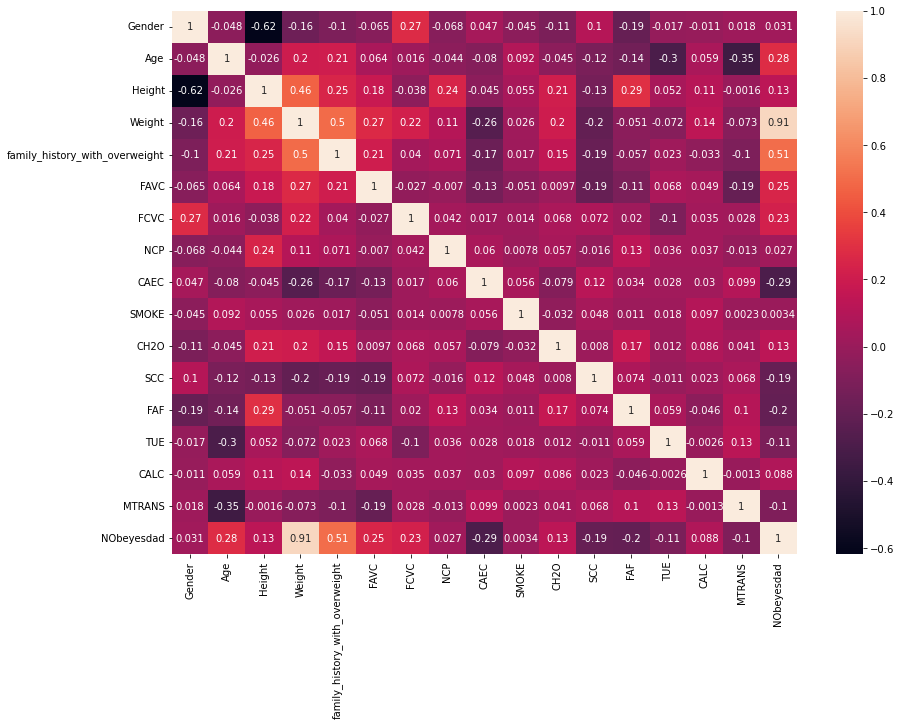

In [8]:
cdf = pd.DataFrame(df2)
cdf.replace({False: -1, True: 1}, inplace=True)
cdf["Gender"] = cdf["Gender"].map({"Male": -1, "Female": 1}).astype(int)
cdf["CALC"] = cdf["CALC"].map({"no": 0, "Sometimes": 3, "Frequently": 10, "Always": 30}).astype(int)
cdf["CAEC"] = cdf["CAEC"].map({"no": 0, "Sometimes": 3, "Frequently": 10, "Always": 30}).astype(int)
cdf["MTRANS"] = cdf["MTRANS"].map({
    "Walking": 10,
    "Bike": 15,
    "Public_Transportation": 3,
    "Motorbike": 3,
    "Automobile": 1,
}).astype(int)
cdf["NObeyesdad"] = cdf["NObeyesdad"].map({
    "Insufficient_Weight": -1,
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 2,
    "Obesity_Type_I": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_III": 5,
}).astype(float)
corr = cdf.select_dtypes('number').corr(method="pearson")
plt.figure(figsize = (14, 10))
df3 = cdf
df3["NObeyesdad"] = df2["NObeyesdad"]
sns.heatmap(corr, annot=True)

### Apercu des données traitées

In [9]:
df3

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,-1,2.0,3.0,3,-1,2.000000,-1,0.000000,1.000000,0,3,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,-1,3.0,3.0,3,1,3.000000,1,3.000000,0.000000,3,3,Normal_Weight
2,-1,23.000000,1.800000,77.000000,1,-1,2.0,3.0,3,-1,2.000000,-1,2.000000,1.000000,10,3,Normal_Weight
3,-1,27.000000,1.800000,87.000000,-1,-1,3.0,3.0,3,-1,2.000000,-1,2.000000,0.000000,10,10,Overweight_Level_I
4,-1,22.000000,1.780000,89.800000,-1,-1,2.0,1.0,3,-1,2.000000,-1,0.000000,0.000000,3,3,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,3,-1,1.728139,-1,1.676269,0.906247,3,3,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,3,-1,2.005130,-1,1.341390,0.599270,3,3,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,3,-1,2.054193,-1,1.414209,0.646288,3,3,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,3,-1,2.852339,-1,1.139107,0.586035,3,3,Obesity_Type_III


#### 

In [10]:
df3.dtypes

Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
CAEC                                 int64
SMOKE                                int64
CH2O                               float64
SCC                                  int64
FAF                                float64
TUE                                float64
CALC                                 int64
MTRANS                               int64
NObeyesdad                        category
dtype: object

## Entrainement


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


### Partionnement des données

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

df4 = pd.DataFrame(df3)
X = df4.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
X_columns = X.columns
y = df4['NObeyesdad']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


### Modele

In [110]:
"""param_grid = {
    'n_estimators': [400, 420, 450, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}"""

"""param_grid = {
    'n_estimators': [400, 430, 450, 470, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}"""

param_grid = {
    'n_estimators': [100, 125, 140, 150, 160, 175],
    'max_depth': [7, 9, 15, 17],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}

model = RandomForestClassifier(random_state=1)

### GridSearch

In [111]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [7, 9, 15, 17],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 125, 140, 150, 160, 175]})

### Evaluation

In [112]:
y_val_pred = grid_search.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8625592417061612


### Visualisation d'un arbre

In [53]:
from sklearn import tree

clf = grid_search.best_estimator_.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,10), dpi=1200)
tree.plot_tree(clf,
           feature_names = X_columns, 
           class_names=["under", "ok", "ov1", "ov2", "ob1", "ob2", "ob3"],
           filled = True);

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

# Séparer les données en ensembles d'entraînement, de test et de validation
X = df4.drop(['NObeyesdad', 'Weight'], axis=1)
y = df4['NObeyesdad']

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Créer un modèle de réseau de neurones plus complexe
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle et conserver l'historique des pertes
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_val, y_val))

# Évaluer le modèle
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

# Prédire les labels pour l'ensemble de validation
y_val_pred = model.predict(X_val)

# Convertir les prédictions en labels
y_val_pred = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

# Calculer la matrice de confusion
confusion = confusion_matrix(y_val_true, y_val_pred)

print(f'Confusion Matrix: \n{confusion}')

# Visualiser la fonction de perte
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2024-06-03 22:58:13.066145: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 22:58:13.067525: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 22:58:13.123886: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 22:58:13.374712: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 22:58:14.211466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/250


/home/edgar/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-03 22:58:16.092005: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-03 22:58:16.092608: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requir

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1329 - loss: 1.5110 - val_accuracy: 0.1517 - val_loss: 1.4581
Epoch 2/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1339 - loss: 1.4612 - val_accuracy: 0.1517 - val_loss: 1.5427


/home/edgar/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/edgar/.local/lib/python3.10/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Epoch 3/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1387 - loss: 1.6303 - val_accuracy: 0.1517 - val_loss: 2.0347
Epoch 4/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1469 - loss: 2.2896 - val_accuracy: 0.1517 - val_loss: 3.2984
Epoch 5/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1364 - loss: 3.7865 - val_accuracy: 0.1517 - val_loss: 5.5686
Epoch 6/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1357 - loss: 6.3412 - val_accuracy: 0.1517 - val_loss: 8.9826
Epoch 7/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1329 - loss: 10.0911 - val_accuracy: 0.1517 - val_loss: 13.5780
Epoch 8/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1220 - loss: 14.9732 - val_accuracy: 0.1517 - val_loss: 19.4463
Epoch 9/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1512 - loss: 21.1103 - val_accuracy: 0.1517 - val_loss: 26.4593
Epoch 10/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1265 - loss: 28.3970 - val_accuracy: 0.

/home/edgar/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/edgar/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


AxisError: axis 1 is out of bounds for array of dimension 1

In [793]:
# Évaluer le modèle
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5914 - loss: 1.8115 
Validation Accuracy: 0.6320754885673523
